# txtファイルの読み込み及びファイル作成のテスト

In [64]:
import os

In [65]:


# OPTIONAL: Load the "autoreload" extension so that code can change
%load_ext autoreload

# OPTIONAL: always reload modules so that as you change code in src, it gets loaded
%autoreload 2

from src import OpenFile as of
from src.MSreader import extract_values


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [66]:
# 出力用フォルダの作成
path_output_folder=of.make_folder("output")

Folder 'output' already exists in '.'.


In [67]:
# 入力ファイルの指定
path_input_folder="../input"
name_input= "case61Lin.ms8"
path_input_data= os.path.join(path_input_folder, name_input)



In [68]:
# 入力ファイルの読み込み
with open(path_input_data, "r") as f:
    data_txt = f.read()


In [69]:
data_txt

'  *** print out input file informations ***\n Start reading input file.\n==================================================\n Read and inputted information by TPFIT_LPT Ver.1.72       \n==================================================\n#orifice_case39                                                                                                         \n--------------------------------------------------\n     [iver] command card\n--------------------------------------------------\nreading file based on TPFIT Ver. 2.10 input format.\n--------------------------------------------------\n     [file] command card\n--------------------------------------------------\n\n  new simulation will be started.\n write interval calculation info.    10\n\n    restart file will be created.\n\n time interval of restart file output:  3.5400E+03\n--------------------------------------------------\n     [calc] command card\n--------------------------------------------------\nSelect solved equations\n  

In [70]:
#改行ごとに分割
lines = data_txt.split('----------------------------------------------------------------------')
print(len(lines))
list_preset=[]
list_isteprow=[]
for i,block in enumerate(lines) :
    if i ==0:
        line=block.split("\n")
        list_preset.append(line)
    else:
        line = block.split("\n")
        list_isteprow.append(line[1:-1])

list_isteprow[1]

779


[' istep =         10 time  =  2.813E-13',
 ' ----- maximum velocity data -----',
 'ulmax= 1.53470E-24 @(  37,  33, 468) vlmax= 1.53470E-24 @(  33,  37, 468) wlmax= 2.70791E-10 @(  31,  22, 473)',
 'ugmax= 1.53470E-24 @(  37,  33, 468) vgmax= 1.53470E-24 @(  33,  37, 468) wgmax= 2.70791E-10 @(  31,  22, 473)',
 ' ----- maximum and minimum data of pres.               and temp. -----',
 'pmax= 1.00191E+05 @(  27,  22, 473) pmin= 9.99995E+04 @(  28,  21,   1)',
 'tmax= 3.00000E+02 @(  26,  24,  16) tmin= 2.99427E+02 @(  27,  24, 474)',
 ' ----- maximum density of both phases -----',
 'r1max= 9.80086E+02 @(  27,  24, 473) r2max= 1.16353E+00 @(  27,  24, 473)']

In [71]:
for i,p in enumerate(list_isteprow):
    if i>=10:break
    print(p[0])

# 分裂方法の例
import re
print(re.split('[ =, ]+', list_isteprow[0][0]))

 istep =          1 time  =  2.236E-14
 istep =         10 time  =  2.813E-13
 istep =         20 time  =  7.394E-13
 istep =         30 time  =  1.486E-12
 istep =         40 time  =  2.701E-12
 istep =         50 time  =  4.681E-12
 istep =         60 time  =  7.906E-12
 istep =         70 time  =  1.316E-11
 istep =         80 time  =  2.172E-11
 istep =         90 time  =  3.566E-11
['', 'istep', '1', 'time', '2.236E-14']


In [72]:

# 使用例
lines = [
    "istep =      39890 time  =  5.618E-03",
    "istep =      39900 time  =  5.620E-03",
    "istep =      40000 time  =  5.622E-03"
]

istep_values = extract_values(lines, "istep")
time_values = extract_values(lines, "time")

print(f"istep values: {istep_values}")
print(f"time values: {time_values}")


istep values: [39890, 39900, 40000]
time values: [0.005618, 0.00562, 0.005622]


In [73]:
list_istep=[]
list_time = []
for p in list_isteprow:
    istep_values = extract_values(p, "istep")
    time_values = extract_values(p,"time")

    list_istep.append(istep_values[0])
    list_time.append(time_values[0])
    print(istep_values[0],time_values[0])

1 2.236e-14
10 2.813e-13
20 7.394e-13
30 1.486e-12
40 2.701e-12
50 4.681e-12
60 7.906e-12
70 1.316e-11
80 2.172e-11
90 3.566e-11
100 5.836e-11
110 9.535e-11
120 1.556e-10
130 2.537e-10
140 4.136e-10
150 6.739e-10
160 1.098e-09
170 1.789e-09
180 2.914e-09
190 4.747e-09
200 7.733e-09
210 1.26e-08
220 2.052e-08
230 3.342e-08
240 5.444e-08
250 8.868e-08
260 1.445e-07
270 2.353e-07
280 3.833e-07
290 6.243e-07
300 1.017e-06
310 1.517e-06
320 2.017e-06
330 2.517e-06
340 3.017e-06
350 3.517e-06
360 4.017e-06
370 4.517e-06
380 5.017e-06
390 5.517e-06
400 6.017e-06
410 6.517e-06
420 7.017e-06
430 7.517e-06
440 8.017e-06
450 8.517e-06
460 9.017e-06
470 9.517e-06
480 1.002e-05
490 1.052e-05
500 1.102e-05
510 1.152e-05
520 1.202e-05
530 1.252e-05
540 1.302e-05
550 1.352e-05
560 1.402e-05
570 1.452e-05
580 1.502e-05
590 1.552e-05
600 1.602e-05
610 1.652e-05
620 1.702e-05
630 1.752e-05
640 1.802e-05
650 1.852e-05
660 1.902e-05
670 1.952e-05
680 2.002e-05
690 2.052e-05
700 2.102e-05
710 2.152e-05
720 

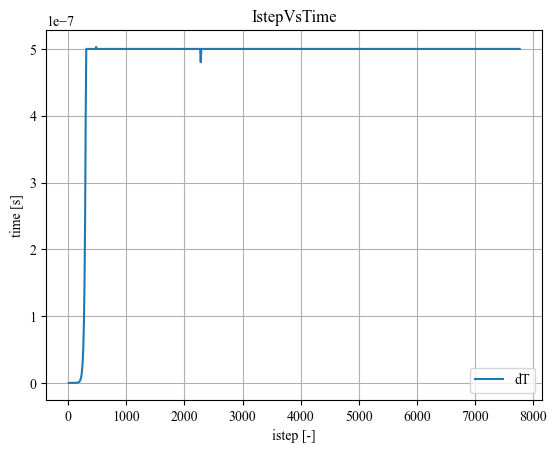

In [74]:
from matplotlib import pyplot as plt
import numpy as np
fig, ax = plt.subplots(1,1)
ax.plot(list_istep[1:],np.diff( np.array(list_time) ),label='dT')
ax.set_title("IstepVsTime")
ax.set_xlabel("istep [-]")
ax.set_ylabel("time [s]")
ax.grid()
ax.legend()
plt.show()

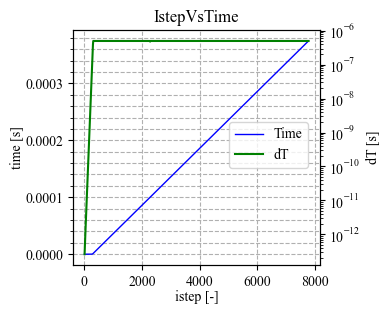

In [75]:
from matplotlib.ticker import AutoMinorLocator, LogLocator,NullFormatter,MaxNLocator,MultipleLocator



# グラフの作成（二つのy軸を持つ）
fig, ax1 = plt.subplots(figsize=(4, 3))


# MatplotlibのrcParamsを使用してフォントを設定する
plt.rcParams['font.family'] = 'serif'  # 使用するフォントファミリーを設定する
plt.rcParams['font.serif'] = ['Times New Roman']  # Times New Romanフォントを設定する

# プロット1: 平均直径と標準偏差（左のy軸）
ax1.plot(list_istep, list_time, linestyle='-', color='blue', linewidth=1, label='Time')


ax1.set_xlabel('istep [-]',labelpad=1)
ax1.set_ylabel('time [s]',labelpad=1)


# プロット2: 気泡数（右のy軸）
ax2 = ax1.twinx()  # ax1とx軸を共有する二つ目のy軸
ax2.plot(list_istep[1:], np.diff(list_time), color='green', label='dT')

# X軸とY軸を対数軸に変更
ax2.set_yscale('log')
ax2.set_ylabel('dT [s]')

# グラフのタイトルと凡例の表示
plt.title('IstepVsTime')
# 凡例の表示
# ax1.legend(loc='upper center', bbox_to_anchor=(0.25, -0.2), ncol=2)
# ax2.legend(loc='upper center', bbox_to_anchor=(0.9, -0.2), ncol=2)
fig.legend( bbox_to_anchor=(0.8, 0.6))

#グリッドの表示
ax1.yaxis.set_minor_locator(AutoMinorLocator())  # Y軸の副メモリを設定
ax1.grid(True, which='both', linestyle='--')  # 主メモリと副メモリの両方に対してグリッドを表示



# レイアウトの調整
plt.tight_layout()
plt.subplots_adjust(bottom=0.1)  # 下側の余白を調整

plt.show()